In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Simple linear regression/delivery_time.csv")

In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

There is not any null value in our data

In [8]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

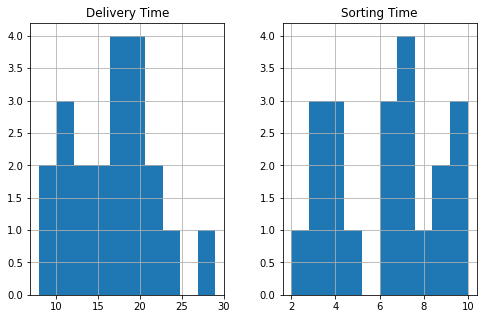

In [9]:
df.hist(figsize=(8,5))
plt.show

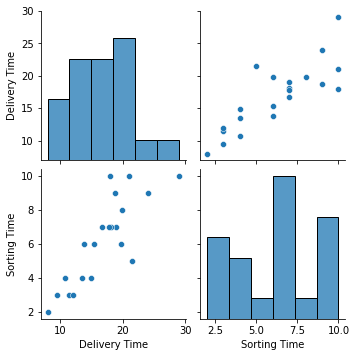

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
d=df.iloc[:,0]
s=df.iloc[:,1]

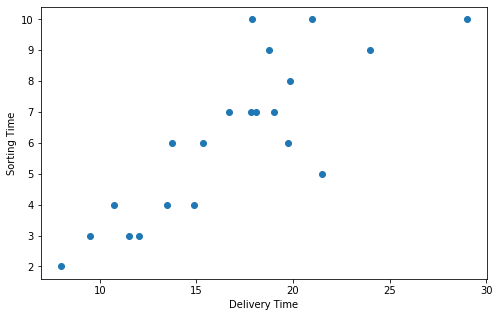

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(d,s)
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

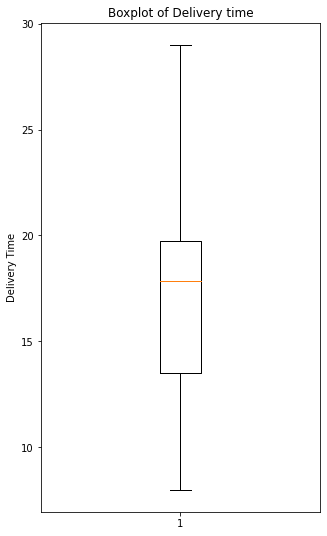

In [13]:
plt.figure(figsize=(5,9))
plt.boxplot(d)
plt.ylabel("Delivery Time")
plt.title("Boxplot of Delivery time")
plt.show()

By seeing boxplot we can say there is no outliers in delivery time

Delivery time data is left skewed.

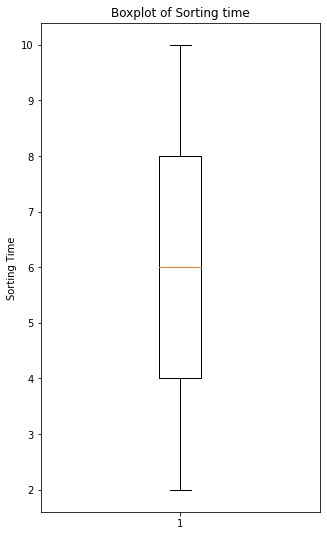

In [14]:
plt.figure(figsize=(5,9))
plt.boxplot(s)
plt.ylabel("Sorting Time")
plt.title("Boxplot of Sorting time")
plt.show()

Sorting Time data is not skewed and has no outliers

We will transform the delivery time variable using a logarithmic transformation to improve the linearity of the relationship between the variables.




Now we will split the data into training and testing data

In [15]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [16]:
#Fit the SLR model on training set
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
lr_pred=lr.predict(x_test)
lr_pred



array([6.88148692, 4.48627515, 8.22879354, 5.23477883, 4.20558628,
       7.60379297, 4.68462863, 3.17639372, 7.29316394])

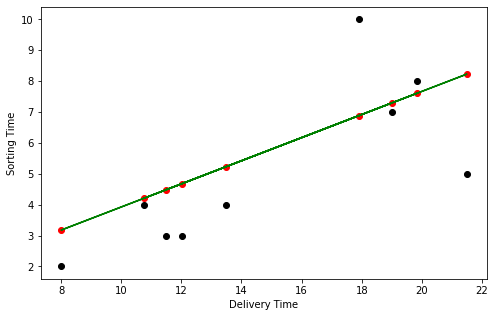

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(x_test,y_test,color='black',label='actual');
plt.plot(x_test,lr_pred,color='green',linestyle='-',label='Predicted');
plt.scatter(x_test,lr_pred,color='red')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [19]:
#Evaluate the performance of the model
print("r2 score of model is:",r2_score(y_test,lr_pred))



r2 score of model is: 0.5009396156609789


r2 score is very low so we have to use different transfortmation method to improve this score.

## **Natural Logarithm**

In [20]:
df1=df
df1['Delivery Time']=df1['Delivery Time'].apply(lambda x: np.log(x))

In [21]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [22]:
#Fit the SLR model on training set
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
lr_pred=lr.predict(x_test)
lr_pred


array([7.12351318, 4.12038829, 8.36732545, 5.20870335, 3.66263508,
       7.81851399, 4.42620625, 1.6571914 , 7.52830395])

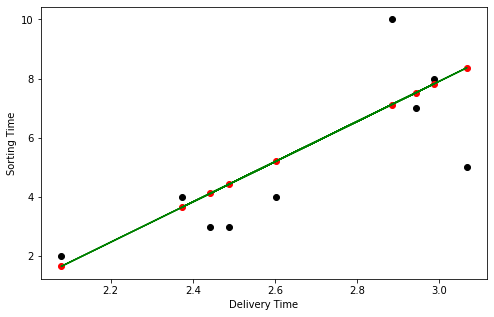

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(x_test,y_test,color='black',label='actual');
plt.plot(x_test,lr_pred,color='green',linestyle='-',label='Predicted');
plt.scatter(x_test,lr_pred,color='red')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [25]:
#Evaluate the performance of the model
print("r2 score of model is:",r2_score(y_test,lr_pred))


r2 score of model is: 0.5621863849003095


There is improvement of 6 points by using logarithm transformation but that is not enough so we will use some more methods

## **Square Root Transformation**
Taking the square root of the delivery time variable can be used to reduce the skewness of the data and improve linearity.

In [26]:
df2=df
df2.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,2.774787,6.190476
std,0.318219,2.542028
min,2.079442,2.000000
25%,2.602690,4.000000
50%,2.880882,6.000000
75%,2.983153,8.000000
max,3.367296,10.000000


In [27]:
df2['Delivery Time']=df2['Delivery Time'].apply(lambda x: np.log(x))

In [28]:
df2.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,1.013999,6.190476
std,0.119072,2.542028
min,0.732099,2.000000
25%,0.956545,4.000000
50%,1.058097,6.000000
75%,1.092981,8.000000
max,1.214110,10.000000


In [29]:
d2=df2.iloc[:,:-1].values
s2=df2.iloc[:,-1].values

In [30]:
lr=LinearRegression()
X=d2.reshape(-1,1)
Y=s2.reshape(-1,1)
linear_reg=lr.fit(X,Y)

In [31]:
lr_pred=lr.predict(X)
lr_pred


array([[7.97213146],
       [5.16010114],
       [7.60693929],
       [8.74194847],
       [9.77927005],
       [6.02388825],
       [7.37267326],
       [2.55892879],
       [7.00569873],
       [7.29181709],
       [7.63122511],
       [3.51756626],
       [6.56139955],
       [4.01974975],
       [4.34758241],
       [5.81851368],
       [5.28609359],
       [7.07806172],
       [1.13488113],
       [6.98132329],
       [8.11020698]])

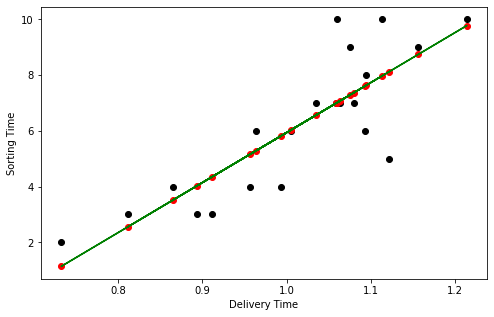

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(X,Y,color='black',label='actual');
plt.plot(X,lr_pred,color='green',linestyle='-',label='Predicted');
plt.scatter(X,lr_pred,color='red')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [33]:
r2_score(Y,lr_pred)

0.70569613550559

By using square root transformation our r2 score is increased by around 13 points. We will try some other methods also

## **Exponential transformation**
Exponential transformation can be used to linearize data that exhibits exponential growth or decay.

In [34]:
df3=df
df3.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,1.013999,6.190476
std,0.119072,2.542028
min,0.732099,2.000000
25%,0.956545,4.000000
50%,1.058097,6.000000
75%,1.092981,8.000000
max,1.214110,10.000000


In [35]:
df3['Delivery Time']=df3['Delivery Time'].apply(lambda x: np.exp(x))
df3

,Delivery Time,Sorting Time
0,3.044522,10
1,2.602690,4
2,2.983153,6
3,3.178054,9
4,3.367296,10
5,2.731115,6
6,2.944439,7
7,2.251292,3
8,2.884801,10
9,2.931194,9


In [36]:
d3=df3.iloc[:,:-1].values
s3=df3.iloc[:,-1].values

In [37]:
lr=LinearRegression()
X=d3.reshape(-1,1)
Y=s3.reshape(-1,1)
linear_reg=lr.fit(X,Y)

In [38]:
lr_pred=lr.predict(X)
lr_pred

array([[ 8.0072956 ],
       [ 5.0313097 ],
       [ 7.59394209],
       [ 8.90670276],
       [10.18135141],
       [ 5.89632782],
       [ 7.33317862],
       [ 2.66445223],
       [ 6.93148219],
       [ 7.24396475],
       [ 7.62117021],
       [ 3.49706001],
       [ 6.4560177 ],
       [ 3.95131402],
       [ 4.25479422],
       [ 5.68686948],
       [ 5.15490122],
       [ 7.01004265],
       [ 1.5069465 ],
       [ 6.90509042],
       [ 8.1657864 ]])

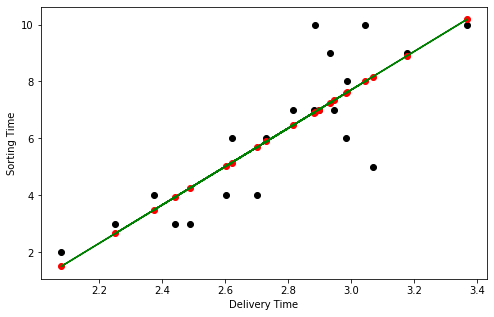

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(X,Y,color='black',label='actual');
plt.plot(X,lr_pred,color='green',linestyle='-',label='Predicted');
plt.scatter(X,lr_pred,color='red')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [40]:
r2_score(Y,lr_pred)

0.7109478980584185

This is slightly better than sq root method but not enough. We will try some more model.

## **Cubic Root Transformation**

In [41]:
df4=df
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,2.774787,6.190476
std,0.318219,2.542028
min,2.079442,2.000000
25%,2.602690,4.000000
50%,2.880882,6.000000
75%,2.983153,8.000000
max,3.367296,10.000000


In [56]:
X=df4.iloc[:,:-1].values
Y=df4.iloc[:,-1].values

In [57]:
Y_cbrt=np.cbrt(Y)

In [58]:
lr.fit(X,Y_cbrt)

LinearRegression()

In [59]:
Y_pred_cbrt=lr.predict(X)
Y_pred_cbrt

array([1.99762092, 1.67277571, 1.95250111, 2.09579615, 2.23493106,
       1.76719719, 1.92403735, 1.41442021, 1.88018998, 1.91429916,
       1.95547321, 1.50530393, 1.82829041, 1.55488825, 1.58801478,
       1.74433366, 1.6862664 , 1.88876528, 1.2880721 , 1.87730917,
       2.01492106])

In [60]:
Y_pred_cbrt_inv = np.power(Y_pred_cbrt, 3)
Y_pred_cbrt_inv

array([ 7.97148498,  4.68072514,  7.44344306,  9.20549436, 11.16329474,
        5.51893191,  7.12263179,  2.8296672 ,  6.64668655,  7.01502833,
        7.47748608,  3.41092824,  6.11132734,  3.75921826,  4.00464127,
        5.30748388,  4.79488903,  6.73804603,  2.13707873,  6.61618139,
        8.18039189])

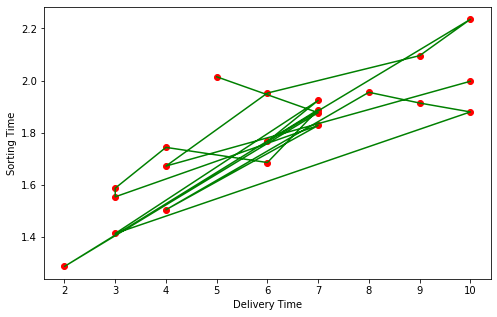

In [61]:
plt.figure(figsize=(8,5))
plt.plot(Y,Y_pred_cbrt,color='green',linestyle='-',label='Predicted');
plt.scatter(Y,Y_pred_cbrt,color='red')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [62]:
r2_cbrt=r2_score(Y,Y_pred_cbrt_inv)
r2_cbrt

0.6903043143791001

# **BOX-COX**

In [55]:
df5=df
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,2.774787,6.190476
std,0.318219,2.542028
min,2.079442,2.000000
25%,2.602690,4.000000
50%,2.880882,6.000000
75%,2.983153,8.000000
max,3.367296,10.000000


In [63]:
X5=df5.iloc[:,:-1].values
Y5=df5.iloc[:,-1].values

In [65]:
y5_boxcox,_=boxcox(Y5)

In [66]:
lr.fit(X5,y5_boxcox)

LinearRegression()

In [67]:
y_pred_boxcox=lr.predict(X5)

In [68]:
y_pred_boxcox_inv= np.power(y_pred_boxcox, 1/0.15)

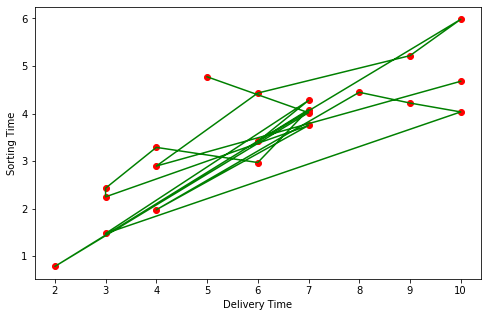

In [69]:
plt.figure(figsize=(8,5))
plt.plot(Y5,y_pred_boxcox,color='green',linestyle='-',label='Predicted');
plt.scatter(Y5,y_pred_boxcox,color='red')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

In [76]:
r2_boxcox = r2_score(Y5, y_pred_boxcox_inv)
r2_boxcox

-233724248.3760335

# **Ordinary Least Square**

In [45]:
df.head()

,Delivery Time,Sorting Time
0,3.044522,10
1,2.602690,4
2,2.983153,6
3,3.178054,9
4,3.367296,10


In [46]:
df.rename(columns={"Delivery Time":"Delivery","Sorting Time":"Sorting"},inplace=True)
df.head()

,Delivery,Sorting
0,3.044522,10
1,2.602690,4
2,2.983153,6
3,3.178054,9
4,3.367296,10


In [47]:
Model=smf.ols("Sorting~Delivery",data=df).fit()

In [48]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Sorting   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.59e-06
Time:                        11:19:51   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
Delivery       6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pred=Model.predict(df["Delivery"])
pred

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

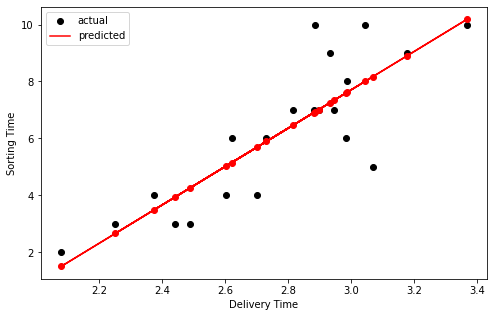

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(df.Delivery,(df.Sorting),color="black",label="actual");
plt.plot(df.Delivery,pred,color="red",linestyle="-",label="predicted");
plt.scatter(df.Delivery,pred,color="red")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.legend(loc="best")
plt.show()


In [51]:
Model2=smf.ols('Sorting~np.log(Delivery)',data=df).fit()
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Sorting   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     45.56
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.90e-06
Time:                        11:19:51   Log-Likelihood:                -36.035
No. Observations:                  21   AIC:                             76.07
Df Residuals:                      19   BIC:                             78.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -11.9946      2.712     -4.423      0.000     -17.671      -6.319
np.log(Delivery)    17.9340      2.657      6.750      0.000      12.373      23.495
==============================================================================
Omnibus:                        0.808   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.076
Skew:                          -0.075   Prob(JB):                        0.963
Kurtosis:                       3.254   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
Model2=smf.ols('np.log(Sorting)~Delivery',data=df).fit()
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(Sorting)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        11:19:51   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
Delivery       1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
smf.ols('Sorting~np.exp(Delivery)',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Sorting   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        11:19:52   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7567      1.134     -0.667      0.513      -3.130       1.617
np.exp(Delivery)     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
df["Delivery_Sq"]=df.Sorting**2
Model_quad=smf.ols('np.log(Sorting)~Delivery+Delivery_Sq',data=df).fit()
Model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(Sorting)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     97.56
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           2.19e-10
Time:                        11:19:52   Log-Likelihood:                 12.611
No. Observations:                  21   AIC:                            -19.22
Df Residuals:                      18   BIC:                            -16.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2750      0.401     -0.685      0.502      -1.118       0.568
Delivery        0.5790      0.164      3.537      0.002       0.235       0.923
Delivery_Sq     0.0089      0.002      5.528      0.000       0.006       0.012
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.820
Skew:                          -0.403   Prob(JB):                        0.664
Kurtosis:                       2.465   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We got the best score till now, we can use this model for predicting delivery time

In [55]:
#log=np.log(df.Sorting)
df["Sorting_log"]=np.log(df.Sorting)
df["D_sq"]=df["Delivery"]+df["Delivery_Sq"]
df.head()

,Delivery,Sorting,Delivery_Sq,Sorting_log,D_sq
0,3.044522,10,100,2.302585,103.044522
1,2.602690,4,16,1.386294,18.602690
2,2.983153,6,36,1.791759,38.983153
3,3.178054,9,81,2.197225,84.178054
4,3.367296,10,100,2.302585,103.367296


In [56]:
pred=Model_quad.predict(df)
pred

0     2.380176
1     1.374687
2     1.773462
3     2.287918
4     2.567055
5     1.627538
6     1.867069
7     1.108763
8     2.287701
9     2.144991
10    2.025695
11    1.242805
12    1.791669
13    1.219379
14    1.245466
15    1.431038
16    1.563806
17    1.839293
18    0.964641
19    1.830271
20    1.724445
dtype: float64

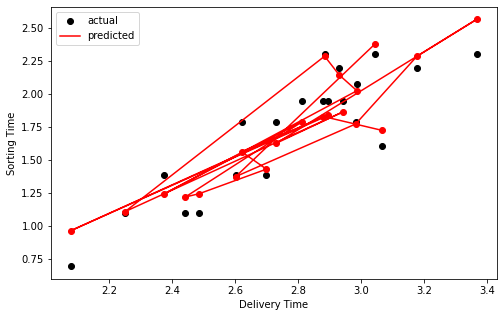

In [57]:
plt.figure(figsize=(8,5))
plt.scatter(df.Delivery,(df.Sorting_log),color="black",label="actual");
plt.plot(df.Delivery,pred,color="red",linestyle="-",label="predicted");
plt.scatter(df.Delivery,pred,color="red")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.legend(loc="best")
plt.show()
